# In Class Notebook, Week 15

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_spring2022/blob/master/week15/inClass_week15.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [2]:
import yt

In [3]:
ds = yt.load('/Users/jnaiman/Downloads/IsolatedGalaxy/galaxy0030/galaxy0030')
# windows: C://...

yt : [INFO     ] 2022-04-25 15:38:36,997 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2022-04-25 15:38:36,998 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-04-25 15:38:36,999 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-25 15:38:37,000 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-04-25 15:38:37,001 Parameters: cosmological_simulation   = 0


In [4]:
ds.print_stats()

Parsing Hierarchy : 100%|██████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 15203.76it/s]
yt : [INFO     ] 2022-04-25 15:39:24,508 Gathering a field list (this may take a moment.)


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         32768	            32
  1	     8	         34304	            33
  2	     8	        181888	            57
  3	     8	        646968	            87
  4	    15	        947856	            99
  5	    51	        874128	            96
  6	    18	        786328	            93
  7	    28	        446776	            77
  8	    36	        209400	            60
----------------------------------------------
   	   173	       4160416


t = 6.00002000e-03 = 1.39768066e+16 s = 4.42898275e+08 years

Smallest Cell:
	Width: 1.221e-04 Mpc Mpc
	Width: 1.221e+02 pc pc
	Width: 2.518e+07 AU AU
	Width: 3.767e+20 cm cm


In [5]:
ds.field_list

[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Average_creation_time'),
 ('enzo', 'Bx'),
 ('enzo', 'By'),
 ('enzo', 'Bz'),
 ('enzo', 'Cooling_Time'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'Forming_Stellar_Mass_Density'),
 ('enzo', 'Galaxy1Colour'),
 ('enzo', 'Galaxy2Colour'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HeIII_Density'),
 ('enzo', 'HeII_Density'),
 ('enzo', 'HeI_Density'),
 ('enzo', 'MBHColour'),
 ('enzo', 'Metal_Density'),
 ('enzo', 'PhiField'),
 ('enzo', 'Phi_pField'),
 ('enzo', 'SFR_Density'),
 ('enzo', 'Star_Particle_Density'),
 ('enzo', 'Temperature'),
 ('enzo', '

In [6]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'pa

In [7]:
ds.domain_right_edge, ds.domain_left_edge

(unyt_array([1., 1., 1.], 'code_length'),
 unyt_array([0., 0., 0.], 'code_length'))

In [8]:
ds.r[:].max("density")

unyt_quantity(7.73426504e-24, 'g/cm**3')

In [9]:
ds.r[:].argmax("density")

(unyt_quantity(0.50408936, 'code_length'),
 unyt_quantity(0.49981689, 'code_length'),
 unyt_quantity(0.50018311, 'code_length'))

yt : [INFO     ] 2022-04-25 15:44:57,360 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-25 15:44:57,361 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-25 15:44:57,364 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-04-25 15:44:57,565 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



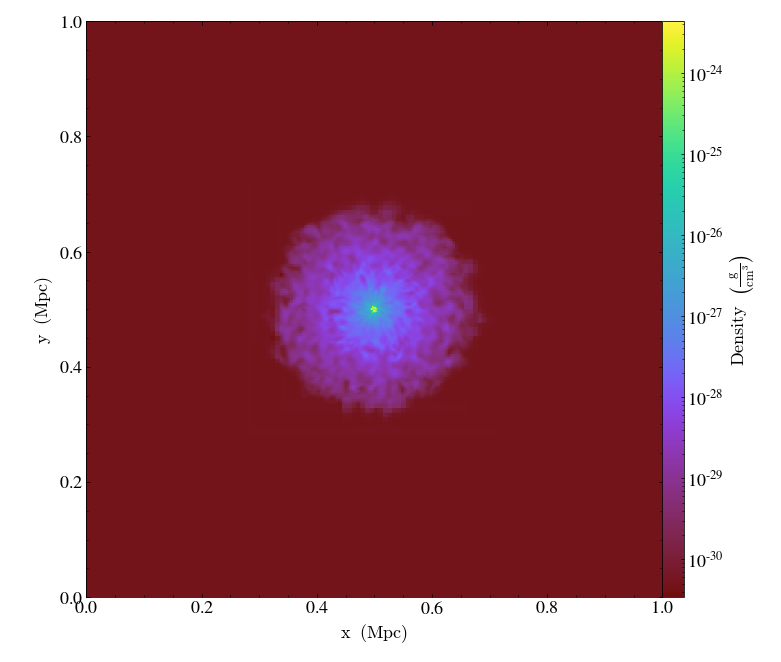

In [10]:
p = ds.r[:,:,0.5].plot("density")

yt : [INFO     ] 2022-04-25 15:45:35,256 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-04-25 15:45:35,267 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



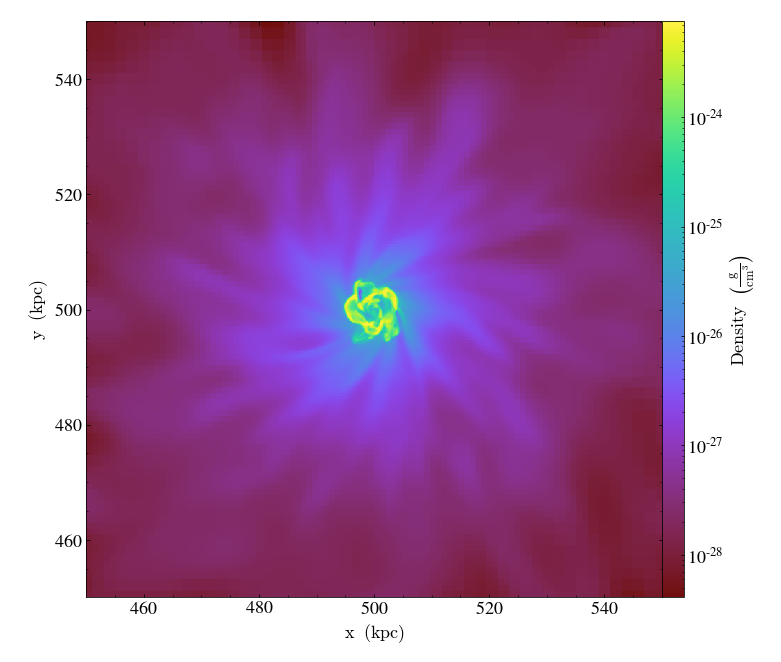

In [11]:
p.zoom(10)

In [12]:
yt.units.kpc.get_cgs_equivalent()

cm

In [13]:
(yt.units.kpc**3).get_cgs_equivalent()

cm**3